In [3]:
%matplotlib inline
from ecell4 import *
import numpy as np
import math
import matplotlib.pyplot as plt

Ks = [10]#[4,10,50,60]

for K in Ks:
    run = 2#2000
    T = 800

    L=1.
    voxelr=L/(2*K)
    Da = 0.1
    Db = 0.
    D=Da+Db
    kd= 4.0*math.pi*D*2*voxelr
    ka = 0.02
    kon = ka*kd/(ka+kd)
    k2 = 0.1
    print('kd',kd,'ka', ka,'k2',k2,'kon',kon)
    V1 = L**3
    ws = spatiocyte.SpatiocyteWorld(ones()*L,voxelr)
    V2 =  ws.get_volume()
    Nv = ws.size()

    Ls = (V2)**(1./3)
    print 'L',L
    print 'Ls',Ls
    print 'rv',voxelr
    print 'K',L/(2*voxelr)
    print 'V1',V1,'V2',V2,'Nv',Nv
    print 'tau',(2*voxelr)**2/Da
    Nb = 1
    Na=0

    #phi = (100*2*N*4.*math.pi*(voxelr**3)/(3*V2)) 
    print 'no of b',Nb
    #print 'vol fract %',phi

    with species_attributes():
        A | {'D': str(Da), 'radius':str(voxelr)}
        B | {'D': str(Db), 'radius':str(voxelr)}

    with reaction_rules():#for egfrd 
        A + B > B | ka
        ~A > A | k2/V2

    m1 = get_model()

    with species_attributes():
        A | {'D': str(Da), 'radius':str(voxelr)}
        B | {'D': str(Db), 'radius':str(voxelr)}

    with reaction_rules():#for spa 
        A + B > B | ka
        ~A > A | k2

    m2 = get_model()

    spa = np.array(ensemble_simulations(run, T, y0={'A':Na,'B': Nb}, model=m2, solver=("spatiocyte", voxelr), volume=V1,return_type='array'))
    ts = spa[0][0][:,0]
    nas = np.mean(spa[0][:,:,1],axis=0)
    print 'mean Na=',np.mean(nas[-100::])
    plt.plot(ts,nas,label='K={0:2d},r={1:0.3f}'.format(K,voxelr))
    plt.ylabel('Na')
    plt.xlabel('time')
    print '\n'
plt.title("L={4:1.0f},Da={0:0.1f},ka={1:0.2f},k2={3:0.1f},Nb={5:1.0f}".format(Da,ka,kd,k2,L,Nb))
fig = plt.gcf()
fig.set_size_inches(7,4)
plt.legend(loc='best')
#plt.savefig("figure/Sturrock_reaction2.png",format='png',dpi=100)

('kd', 0.12566370614359174, 'ka', 0.02, 'k2', 0.1, 'kon', 0.017253948766031743)
L 1.0
Ls 1.18478834472
rv 0.05
K 10.0
V1 1.0 V2 1.66311514935 Nv 2352
tau 0.1
no of b 1


IndexError: too many indices for array

In [ ]:
eg = np.array(ensemble_simulations(1, T, y0={"A": Na,'B': Na}, model=m1, solver=("egfrd",voxelr), volume=V2,return_type='array'))
te = eg[0][0][:,0]
nae = np.mean(eg[0][:,:,1],axis=0)

plt.plot(ts,nas,'r--')
plt.plot(te,nae,'b--')

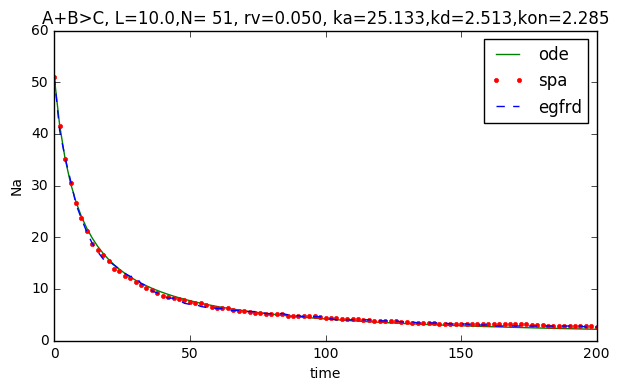

In [4]:
plt.plot(ts,nas,'r.',label='spa')
plt.plot(te,nae,'b--',label='egfrd')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('Na')
fig = plt.gcf()
fig.set_size_inches(7,4)
plt.title('A+B>C, L={0:0.1f},N={1:3.0f}, rv={2:0.3f}, ka={3:0.3f},kd={4:0.3f},kon={5:0.3f}'.format(L,N,voxelr,ka,kd,kon))
#plt.savefig("figure/2ndodr_irr_Difflim_L{0:0.1f}_rv{1:0.2f}.png".format(L,voxelr),format='png',dpi=100)

In [5]:
#stack = np.column_stack((timespa,Nam))
#filename = open('output/Dlim_spa_2ndorder_irr_L1_kakd5.csv','w')
#np.savetxt(filename,stack,fmt='%s')
#filename.close()

In [5]:
0.1/0.01

10.0